In [1]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from math import *
from numpy import *
import numpy as np
import time

SkyCoord(ra=10.68458, dec=41.26917, unit=(u.degree, u.degree))
SkyCoord('00h42m44.3s +41d16m9s')

def coordenadas(RA,DEC):
    c = SkyCoord(ra=RA, dec=DEC, unit=(u.degree, u.degree))
    RA_eq=c.ra.to('hourangle')
    DEC_eq=c.dec
    
    ra_rad = c.ra.wrap_at(180 * u.deg).radian
    dec_rad = c.dec.radian
    return RA_eq,DEC_eq,ra_rad,dec_rad


from astropy.coordinates import SkyCoord
from astropy import units as u

def coordenadas_gal(RA,DEC):
    c = SkyCoord(ra=RA, dec=DEC, unit=(u.degree, u.degree), frame='icrs')
    l_rad = c.galactic.l.radian
    b_rad = c.galactic.b.radian
    if(l_rad > np.pi):
        l_rad=l_rad-2. * np.pi
    return l_rad,b_rad


def extraer_coordenadas(filename):
    datos = loadtxt(filename, float)
    l_Total_Sample = []
    b_Total_Sample = []
    RA=[]
    DEC=[]
    for i in range (0,len(datos)):
        c = SkyCoord(l=datos[i][1], b=datos[i][2], unit=(u.degree, u.degree), frame='galactic')
#        print(c.galactic.l.radian,c.galactic.b.radian)
        RA.append(datos[i][1])
        DEC.append(datos[i][2])
        l_rad = c.galactic.l.radian
        b_rad = c.galactic.b.radian
        if(l_rad > np.pi):
            l_rad=l_rad-2. * np.pi
        l_Total_Sample.append(l_rad)
        b_Total_Sample.append(b_rad)
    return l_Total_Sample,b_Total_Sample,RA,DEC

In [2]:
l_GRBs,b_GRBs,RA,DEC=extraer_coordenadas('Swift_BAT_GRBs_position.txt')

<IPython.core.display.Javascript object>


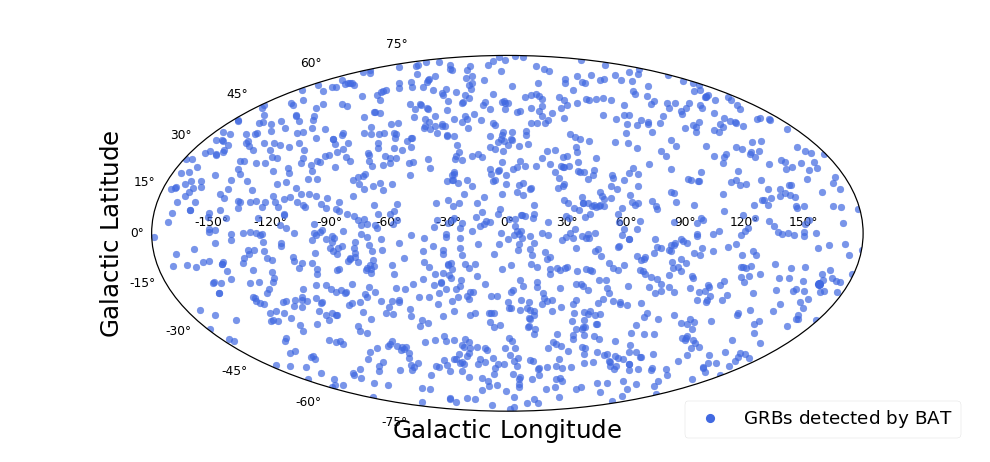

In [6]:
from matplotlib import colors
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
%matplotlib notebook

fig = plt.figure(figsize=(9,4.2))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,1,1, projection='aitoff')



ax.scatter(l_GRBs,b_GRBs, marker='o',  s=20, color='royalblue', linestyle = 'None', alpha=0.7, zorder=2)

ax.plot(l_GRBs[-1],b_GRBs[-1], marker='o', markersize=6, color='royalblue', linestyle = 'None', alpha=1.0, label='$\mathrm{GRBs\ detected\ by\ BAT}$',zorder=2)


ax.set_xlabel("$\mathrm{Galactic\ Longitude}$",fontsize=16.)
ax.set_ylabel("$\mathrm{Galactic\ Latitude}$",fontsize=16.)
ax.legend(loc=4,numpoints=1,bbox_to_anchor= (1.15, -0.1),fancybox=True, framealpha=0.8,fontsize=12,ncol=1)
#ax.grid()

plt.savefig('posicion_fuentes.pdf',format='pdf',dpi=200)

In [ ]:
import numpy as np
from astropy import units as  u
import astropy.coordinates as apycoords
from galpy.orbit import Orbit
from mw_plot import MWSkyMap

# setup a MWSkyMap instance with projection, other projection can be 'hammer', 'mollweide' etc
# grayscale: whether to turn the background image to grayscale
plot_instance = MWSkyMap(projection='aitoff', grayscale=False)

# so that the colorbar will has a better contract
# plot_instance.clim = (5., 15.)

# alpha value for the milkyway image
plot_instance.imalpha = 1.

# set up plot title
#plot_instance.title = 'LMC and SMC in red dots'
plot_instance.s = 20

# LMC and SMC coordinates, get coordinates with galpy from_name
lsmc_ra = [Orbit.from_name('LMC').ra(), Orbit.from_name('SMC').ra()] * u.degree
lsmc_dec = [Orbit.from_name('LMC').dec(), Orbit.from_name('SMC').dec()] * u.degree

# use mw_scatter instead of scatter
#plot_instance.mw_scatter(lsmc_ra, lsmc_dec, 'r')
plot_instance.mw_scatter(RA* u.degree,DEC* u.degree, 'royalblue', alpha=0.7)


plot_instance.savefig(file='projection.png')

# Show the figure
plot_instance.show()


Bad key text.latex.unicode in file /home/jonathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jonathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jonathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Com

/home/jonathan/anaconda3/lib/python3.7/site-packages/mw_plot/mw_plot_matplotlib.py:432: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show(*args, **kwargs)

